In [45]:
import sys
sys.path.insert(1, '/Users/anyak/Documents/Lab/SWC/astroTanya')
# sys.path.insert(1, 'Users/anyak/Documents/Lab/astrocyte graphs')
from glob import glob
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tmd 
from tmd.view import view, plot
import morphio 
import neurom as nm
from neurom.view import matplotlib_impl, matplotlib_utils


import astrobject
from astrobject import ascii, Table

In [46]:
Make_SWC = True

# Paths & Source data



In [33]:
#inputs
Hesse_graphs = '/Users/anyak/Documents/Lab/astrocyte graphs/*.pickle'
#output
out = '/Users/anyak/Documents/Lab/SWC/astroTanya'

In [34]:
#graphs
files = []
for f in glob(Hesse_graphs):
    files.append(f)


In [35]:
file = files[0]

In [36]:
name, filetype, formatting = file.split('/')[-1].split('.')
unpacked = pd.read_pickle(file)

# Make SWC file


In [37]:
# if Make_SWC == True:
graph = astrobject.AG(unpacked)

In [182]:
tips = graph.tips
roots = graph.roots
sigmas_vals = {}

for i in graph.nodes.data('sigma_opt'):
    sigmas_vals[i[0]] = i[1]

In [39]:
def related_tips(root, graph):
    
    try:
        tips = graph.tips
        root_tips = [tip for tip in tips if tip['root'] == root]
        return root_tips
    
    except:
        nodes = list(graph.nodes.data())
        root_nodes = [i for i,j in list(graph.nodes.data()) if j['root'] == root]
        root_tips = [tip for tip in tips if tip in root_nodes]
        return root_tips


In [40]:
# list(graph.nodes.data())[0][1]['root']
r = list(roots)[0]

related_tips(r, graph)

[(28, 249, 115), (22, 271, 116), (27, 268, 131)]

In [41]:
data = graph.swc()

  0%|          | 0/24 [00:00<?, ?it/s]

In [42]:
#some params
ratio=(1, 1, 1)
cell_type = 7
filename = out + f'/{name}.swc'

In [185]:
def swc_save(data, cell_type, filename, ratio=None, sigmas_rad = False, sigmas_vals = None):
    astro = data
    lines = []
    keys = ['#index', 'type ', 'X ', 'Y ', 'Z ', 'radius ', 'parent', '\n']
    soma = 1
    radius = 0.125

    data = Table()
    # ratio = ratio if ratio else self.ratio

    X = []
    Y = []
    Z = []
    POS = []
    PAR = []

    for r in astro:
        for n in r.items():
            x, y, z = n[0]
            X.append(x)
            Y.append(y)
            Z.append(z)
            pos, par = n[1]
            POS.append(pos)
            PAR.append(par)

    ntype = np.full(len(POS), cell_type)
    ntype[0] = 1
    
    if sigmas_rad == True:
        
        if sigmas_vals == None:
            print('Add sigmas values')
            
        radius = [radius]
        filename = out + f'/{name}_rads.swc'
        
        for z in list(zip(X, Y, Z))[1:]:
            radius.append(sigmas_vals[z])
        radius = np.array(radius)

    data['#index'] = np.array(POS)
    data['type'] = ntype
    data['X'] = np.array(X) * ratio[0]
    data['Y'] = np.array(Y) * ratio[1]
    data['Z'] = np.array(Z) * ratio[2]
    data['radius'] = radius
    data['parent'] = np.array(PAR)

    data.write(filename, format='ascii', overwrite=True)

In [186]:
swc_save(data, cell_type=cell_type, filename=filename, ratio = ratio, sigmas_rad=True, sigmas_vals=sigmas_vals)

In [26]:
filename


'/Users/anyak/Documents/Lab/SWC/astroTanya/3wk-ly9-raw.swc'

In [47]:
cell = tmd.io.load_neuron(filename, remove_duplicates=True)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': '/Users/anyak/Documents/Lab/SWC/astroTanya/3wk-ly9-raw'}, xlabel='x', ylabel='y'>)

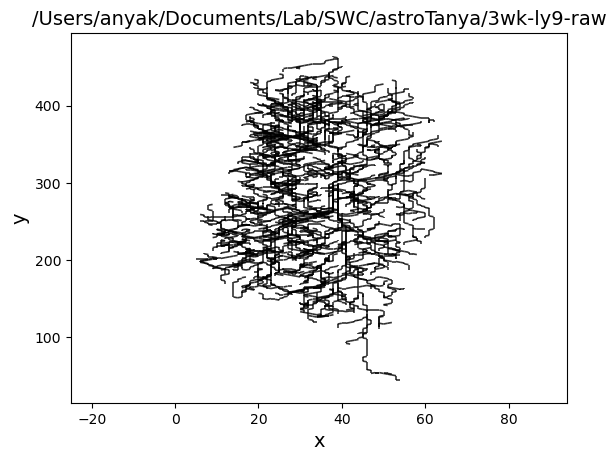

In [57]:
view.neuron(cell, nosoma=True, diameter=False)

In [49]:
ph_astro = tmd.methods.get_ph_neuron(cell)

(array([[1.45018822e-001, 1.82677255e-001, 2.18284045e-001, ...,
         7.16658726e-189, 2.01464625e-193, 4.97851096e-198],
        [1.39700558e-001, 1.82023729e-001, 2.28188889e-001, ...,
         9.07704583e-185, 2.84386759e-189, 7.83228487e-194],
        [1.29280872e-001, 1.71970001e-001, 2.23387965e-001, ...,
         1.01002765e-180, 3.52676517e-185, 1.08251540e-189],
        ...,
        [4.68599658e-003, 3.53713980e-003, 2.34701974e-003, ...,
         6.76721617e-003, 9.23464638e-003, 1.10801901e-002],
        [5.69071801e-003, 4.78735639e-003, 3.54028899e-003, ...,
         4.39044431e-003, 6.67619431e-003, 8.92688006e-003],
        [6.07139886e-003, 5.69240636e-003, 4.69156012e-003, ...,
         2.50309334e-003, 4.24121673e-003, 6.31973683e-003]]),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot: title={'center': 'Persistence image'}, xlabel='End radial distance from soma', ylabel='Start radial distance from soma'>))

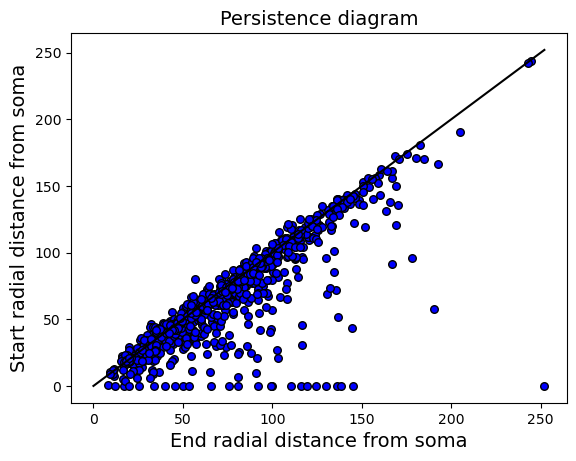

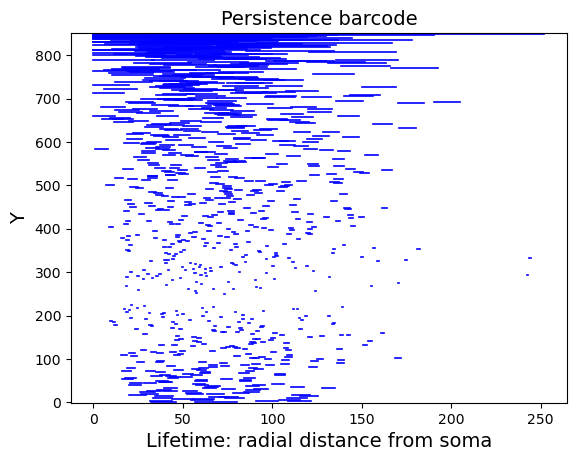

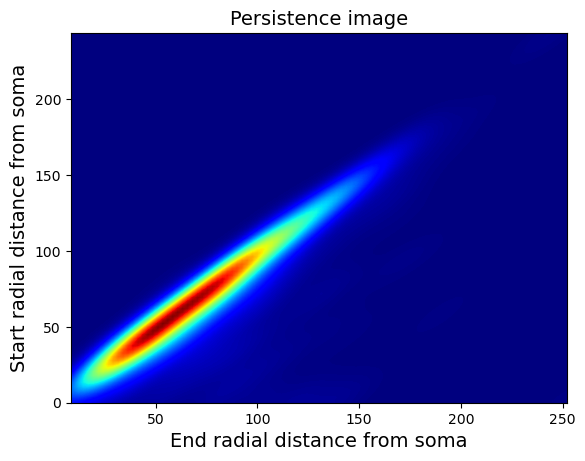

In [62]:
plot.diagram(ph_astro, subplot=True)
# plt.savefig('diagram.png', dpi=300)

plot.barcode(ph_astro, subplot=True)
# plt.savefig('barcode.png', dpi=300)

plot.persistence_image(ph_astro, subplot=True)
# plt.savefig('persistence_image.png', dpi=300)

In [58]:
morphology = nm.io.utils.load_morphology(filename)
morphology

Morphology <soma: SomaSinglePoint(array([[3.7541668e+01, 3.1570834e+02, 1.3025000e+02, 1.2500000e-01]],
      dtype=float32)) <center: [ 37.541668 315.70834  130.25    ], radius: 0.125>, n_neurites: 24>

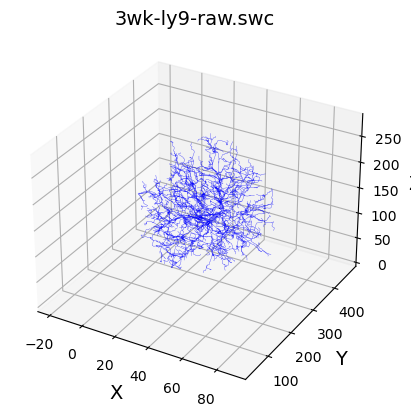

In [59]:
matplotlib_impl.plot_morph3d(morphology, color='blue')
# plt.savefig('cell3d.png', dpi=300)

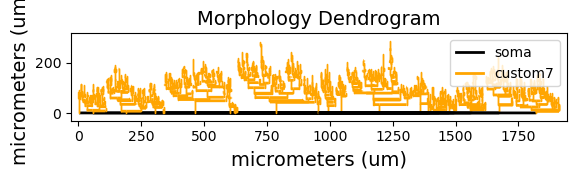

In [61]:
fig, ax = matplotlib_utils.get_figure()
matplotlib_impl.plot_dendrogram(morphology, ax)
matplotlib_utils.plot_style(fig=fig, ax=ax)

# Sigma radius

In [161]:
vals = []
for r in list(map(lambda x: list(x.keys()), data))[1:]:
    for v in r:
        vals.append(s[v])

In [164]:
list(map(lambda x: x*0.125, vals))

[0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.5,
 0.7071067811865476,
 0.5,
 0.5,
 0.7071067811865

In [184]:
x = [0, 0, 0]
y = [1, 1, 1]
z = [2, 2, 2]

for z in list(zip(x, y, z)):
    print(z)

(0, 1, 2)
(0, 1, 2)
(0, 1, 2)


In [169]:
x

[range(0, 10)]